## $$ H = 4E_C n_q^2 - 2E_J \cos(\phi) + \alpha E_J \cos(2\phi - \phi_{ext}) $$
## $$ E_J / E_C = 400 \quad , \quad \phi_{ext} = 0.001\pi $$
## $$ \rightarrow \quad H = 0.04 n_q^2 - 2 \cos(\phi) + \alpha \cos(2\phi - 0.001\pi) $$
## With $\alpha \in [0.5;1]$.. The following is in the $n_q$ basis.

## $$ e^{-i\phi} \rightarrow FT \rightarrow \sum_i |n><n+1|$$
## $$ e^{-i2\phi} \rightarrow FT \rightarrow \sum_i |n><n+2|$$

In [1]:
import torch as t
import numpy as np
import matplotlib.pyplot as plt

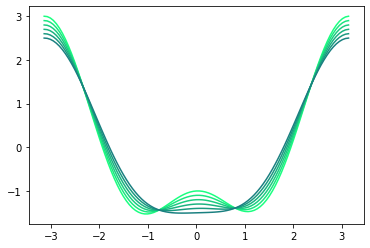

In [90]:
phi_ext = 0.01*np.pi
EC = 1/400
def plot_potential():
    phi = t.linspace(-np.pi,np.pi,101)
    fig, ax = plt.subplots()
    for alpha in np.arange(1,0.4,-0.1):
        ax.plot(phi, -2*t.cos(phi) + alpha*t.cos(2*phi - phi_ext),c=(0.1,alpha,0.5))
    return
plot_potential()

- I have checked that is is in agreeance with the flux basis, and that you need higher resolution for the flux basis to achieve the same precision that the charge basis gets with lower resolution.

- I have also checked that to change between the two simply seems to be a dfft, ie. ( ft = t.fft.ifft(eigvecs\[0\])*np.sqrt(N) to go from charge to flux ) except that the ordering of 'ft' is now \[0,..,+max_freq,-max_freq,...,-0.001\] (see torch.fft.fftshift docs)

In [152]:
N = 51
q = t.linspace(-(N - 1)//2,N//2,N)

q_mat = t.diag(q)
def V_mat(alpha=1):
    return -(t.diag(t.ones(N-1),-1) + t.diag(t.ones(N-1),1)) + alpha/2*(t.diag(t.ones(N-2),-2)*t.exp(t.tensor(-1j*phi_ext)) + t.diag(t.ones(N-2),2)*t.exp(t.tensor(1j*phi_ext)))

def plot_H(H,ids = [0,1,2,3]):
    eigvals, eigvecs = t.linalg.eigh(H)
    eigvecs = eigvecs.T

H = 4*EC*q_mat**2 + V_mat()

eigvals, eigvecs = t.linalg.eigh(H)
eigvecs = eigvecs.T